# Sum of Two Dice Experiment Results

In this workbook, you will open a CSV file with data from your dice experiment, along with that of other groups.

You will compare your results to the aggregate results for all groups and the theoretical values.

As the total number of rolls is will be different depending on whether we are considering individual or aggregated results, we will look at the **percentage** distribution.

## Step 1

In the code below, set the value of `num_groups` and `my_group_num` as established in the experiment.

The filename we will use to load the data should be changed to `'/home/shared/Sum_Of_2_Dice.csv'`.

In [1]:
import numpy as np, matplotlib.pyplot as plt

num_groups = 5
my_group_num = 1

file = "/home/shared/Sum_Of_2_Dice.csv"

## Step 2

Now we will load the data and create 3 `numpy` arrays.

- `my_group_pc`: this will contain the percentages for each possible score for your group's results.
- `all_groups_pc`: This will contain the percentages for all groups combined.
- `theoretical_pc`: This will contain the theoretical percentages.

In [2]:
data = np.loadtxt(file, skiprows=1, delimiter=',')
data = data.T

# The possible scores 2 - 12 are the first row of data
scores = data[0]

# Get percentages for your experiment
my_group_pc = data[my_group_num]/data[my_group_num].sum()*100

# Get percentages for the aggregated data from all experiments
group_sum = np.zeros(11)
for grp in range(1, num_groups+1):
    group_sum = group_sum + data[grp]
all_groups_pc = group_sum/group_sum.sum()*100

# Work out theoretical percentages
theoretical_pc = (6-abs(scores-7))/36*100

## Step 3

Plot a side-by-side bar chart to compare your percentage distribution with that for all groups.

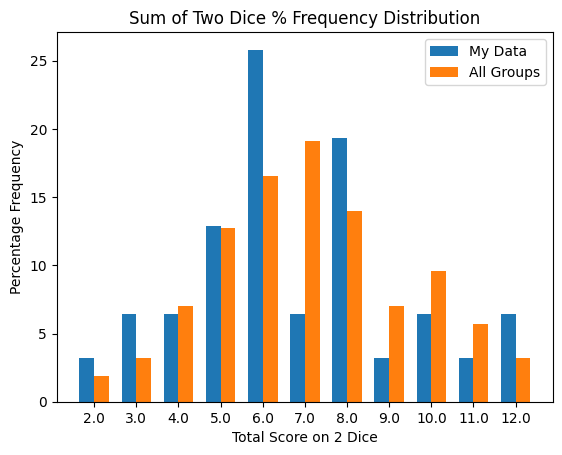

In [3]:
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(scores - width/2, my_group_pc, width, label='My Data')
rects2 = ax.bar(scores + width/2, all_groups_pc, width, label='All Groups')

# 4. Add labels, legend, etc.
ax.set_ylabel('Percentage Frequency')
ax.set_xlabel('Total Score on 2 Dice')
ax.set_title('Sum of Two Dice % Frequency Distribution')
ax.set_xticks(scores, scores)
ax.legend()
plt.show()

## Step 4

Plot a side-by-side bar chart to compare the percentage distribution for all groups with the theoretical distribution.

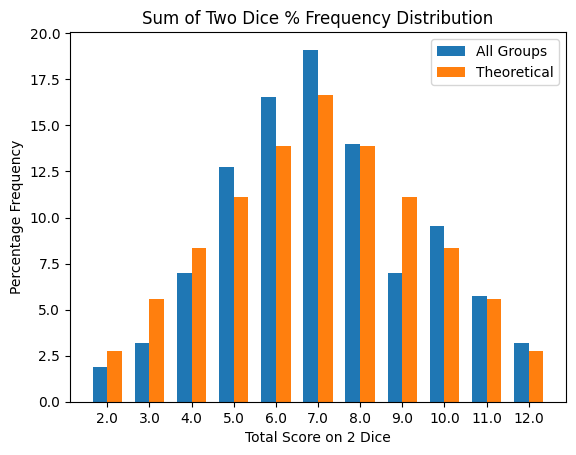

In [4]:
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(scores - width/2, all_groups_pc, width, label='All Groups')
rects2 = ax.bar(scores + width/2, theoretical_pc, width, label='Theoretical')

# 4. Add labels, legend, etc.
ax.set_ylabel('Percentage Frequency')
ax.set_xlabel('Total Score on 2 Dice')
ax.set_title('Sum of Two Dice % Frequency Distribution')
ax.set_xticks(scores, scores)
ax.legend()
plt.show()

## Step 5

Plot side-by-side box plots to compare the distribution of the scores for each of the groups.

To do this, we first have to use our distribution summary from the CSV file to recreate the 'raw' data.

Note: In the box plots, the mean for each group is also shown as a green triangle.

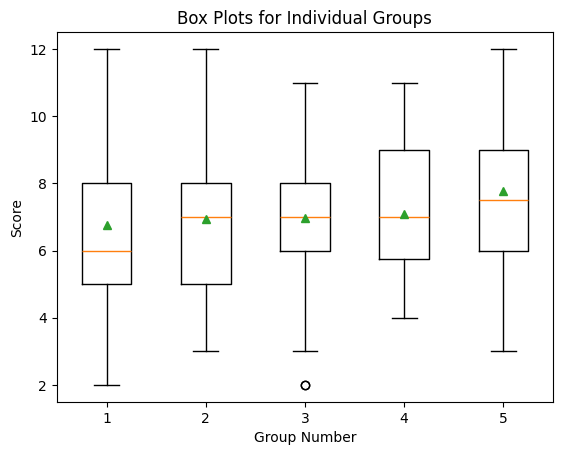

In [5]:
# Turn frequency data from CSV into 'raw' data
grp_list = []
for grp_num in range(1, num_groups+1):
    grp_raw_data = []
    for i in range(11):
        score = int(scores[i])
        my_freq = int(data[grp_num, i])
        for j in range(my_freq):
            grp_raw_data.append(score)
    grp_list.append(grp_raw_data)

# Plot side-by-side box plots to compare results
# The mean is also shown as a green triangle
plt.boxplot(grp_list, showmeans=True)
plt.xlabel('Group Number')
plt.ylabel('Score')
plt.title('Box Plots for Individual Groups')
plt.show()

In [6]:
# Compare means and standard deviations for each group
for i in range(num_groups):
    print("Group ", i+1)
    print(f"Mean = {np.array(grp_list[i]).mean():.1f}, Standard deviation = {np.array(grp_list[i]).std():.1f}")

# Now get mean and standard deviation for aggregated data
all_raw_data = []
for grp in range(num_groups):
    all_raw_data.extend(grp_list[grp])
print("")
print("Aggregated Data")
print(f"Mean = {np.array(all_raw_data).mean():.1f}, Standard deviation = {np.array(all_raw_data).std():.1f}")
print("")
print("Theoretical Mean and Standard Deviation")
print("Mean = 7.0, SD = 2.415")

Group  1
Mean = 6.8, Standard deviation = 2.5
Group  2
Mean = 6.9, Standard deviation = 2.2
Group  3
Mean = 7.0, Standard deviation = 2.3
Group  4
Mean = 7.1, Standard deviation = 2.0
Group  5
Mean = 7.8, Standard deviation = 2.3

Aggregated Data
Mean = 7.1, Standard deviation = 2.3

Theoretical Mean and Standard Deviation
Mean = 7.0, SD = 2.415


## Simulating More Dice

In the following code cells, we simulate rolling `n` dice `t` times and working out the total score as before.

For example, if you roll 3 dice twice, the total on each set of rolls could be any whole number between 3 and 18. You might get results that look like this:

- First roll: 2, 3, 1 giving a total score of 6
- Second roll: 6, 2, 5 giving a total score of 13

Run the code below and view the histogram that is generated from the data. The variables are initially set to rolling 2 dice 100 times. Try different values for `n` and `t` to see what you get. What patterns do you see? Try a few different numbers of dice (n = 2, 3, 4, 5, ...) and for each number of dice, try t = 100, 1000, 10000, 100000.

In [41]:
# set values for n and t
n = 5
t = 10000

# Generate psuedo-random data
score_low = n
score_high = 6*n
rng = np.random.default_rng()
total_scores = []
for roll in range(t):
    dice_scores = rng.integers(low=1, high=7, size=n)
    total_scores.append(int(dice_scores.sum()))

# Peint the first few values in total_scores
print(total_scores[0:10])

[17, 13, 22, 11, 19, 21, 15, 18, 24, 18]


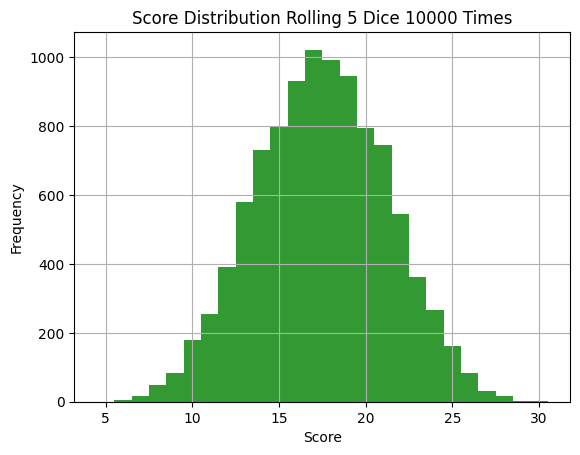

In [42]:
# Create a customized histogram
plt.hist(total_scores, bins = np.arange(score_low - 0.5, score_high + 1.5, 1), alpha=0.8, color='green')
plt.title(f'Score Distribution Rolling {n} Dice {t} Times')
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

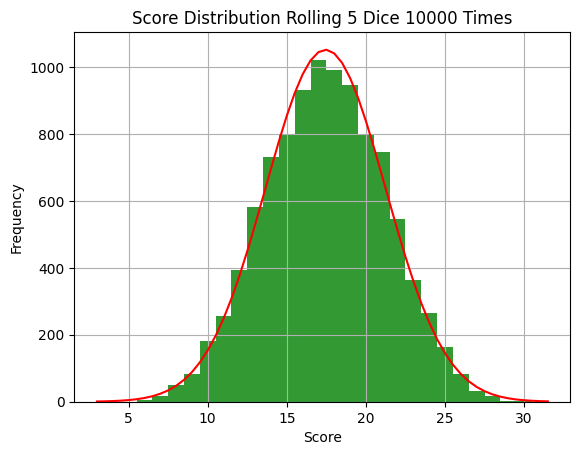

In [43]:
# This code repeats the histogram but also plots the theoretical
# normal distribution that would model the data

ts = np.array(total_scores)
m = ts.mean()
s = ts.std()
x = np.arange(n-2, 6*n+2, 0.5)
y = np.exp(-0.5*((x-m)/s)**2)/(s*math.sqrt(2*math.pi))*t
plt.plot(x, y, color='r')
plt.hist(total_scores, bins = np.arange(score_low - 0.5, score_high + 1.5, 1), alpha=0.8, color='green')
plt.title(f'Score Distribution Rolling {n} Dice {t} Times')
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()